# ***`Direct Consumption Modeling with LIWC Inputs - Undersample`***
---
#### 1. **Dataset Preparation:**
- Read data
- Filter Wourdcount
- Train-test-split
- Oversampling
- Feature Selection
#### 2. **EDA & Feature Selection**
#### 3. **Target: Smoking**
#### 4. **Target Drugs**
---

## Base Libraries
---

In [1]:
import pandas as pd

# enable to see all columns:
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

import shap

from typing import List, Any
from sklearn.base import BaseEstimator
from sklearn.metrics import precision_score, recall_score, f1_score

# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Helper Functions
---

In [2]:
from helper_functions import *

## **1) Data Set Preparation**
---

### 1.1) Read Data:

In [3]:
df = pd.read_parquet("merged_data/df_cascade_consumption_liwc.parquet")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Missing values: {df.isnull().sum().sum()}")
print()
display_data_shape(df)
df.head()

Duplicates: 0
Missing values: 0

Data dimensions:
---------------------------------------------------------------------
 - Number of observations: 1,185
 - Number of columns: 97


userid  smoking_status  alcohol_status  \
0  ba4d96426226699b8c511ce0bee75941            True            True   
1  1a388284961e77942bae7a0ead109eea           False            True   
2  ec539b2398f80d1f395ba4cc06c230a7           False           False   
3  0e0b122ce777606ae73dd055d76fc1c7           False           False   
4  58bcb86a962fc98d2feb5e3562ac45c0            True            True   

   drug_status    WC  Analytic  Clout  Authentic   Tone    WPS  Sixltr    Dic  \
0         True  7197     43.31  59.44      60.57  44.88  19.94   11.39  82.03   
1        False  4025     35.20  73.85      50.29  70.64   8.67   10.71  81.66   
2        False  2741     51.55  71.78      53.26  90.03  13.77   14.19  86.25   
3        False     5      8.19  50.00       1.00   1.00   1.67   20.00  80.00   
4        False  1548     48.77  42.07      79.91  77.98   8.70   12.21  86.95   

   function.  pronoun  ppron     i    we   you  shehe  they  ipron  article  \
0      45.07    15.92  11.45  6.27  0.42  3.49   0.51  0.76   4.47     4.15   
1      46.26    18.76  14.16  7.08  0.77  5.47   0.40  0.45   4.60     4.05   
2      51.77    14.52  10.69  4.85  1.31  2.59   1.61  0.33   3.83     5.25   
3      40.00     0.00   0.00  0.00  0.00  0.00   0.00  0.00   0.00     0.00   
4      48.45    15.44  10.01  7.69  0.65  1.03   0.32  0.32   5.43     5.56   

    prep  auxverb  adverb   conj  negate   verb   adj  compare  interrog  \
0   9.11     7.95    4.71   5.46    2.08  17.13  4.59     1.70      1.56   
1   8.99     8.52    4.57   5.44    1.57  17.89  5.19     1.79      1.49   
2  12.29    10.40    5.18   5.87    1.53  19.41  4.38     0.95      1.64   
3   0.00    20.00    0.00  20.00    0.00  20.00  0.00     0.00      0.00   
4  10.53     9.63    5.81   4.65    1.49  18.22  5.17     1.61      1.36   

   number  quant  affect  posemo  negemo   anx  anger   sad  social  family  \
0    2.15   1.76    7.54    4.28    3.24  0.24   1.29  0.58   11.17    1.36   
1    4.89   1.27    9.69    5.96    3.58  0.37   1.57  0.50   12.50    0.42   
2    1.35   1.50    7.88    5.87    2.01  0.04   0.36  0.84   10.65    0.47   
3    0.00   0.00   20.00    0.00   20.00  0.00   0.00  0.00    0.00    0.00   
4    3.68   2.00    6.91    4.84    2.00  0.19   0.45  0.26    7.69    0.90   

   friend  female  male  cogproc  insight  cause  discrep  tentat  certain  \
0    0.53    1.29  0.83    10.56     2.32   1.13     1.90    2.24     1.35   
1    0.75    0.65  0.72    10.01     1.91   1.61     2.09    2.19     1.69   
2    0.40    1.39  0.80     8.79     1.64   0.73     1.64    2.19     1.64   
3    0.00    0.00  0.00     0.00     0.00   0.00     0.00    0.00     0.00   
4    0.26    0.32  0.84     9.04     1.42   0.97     2.20    2.13     1.36   

   differ  percept   see  hear  feel    bio  body  health  sexual  ingest  \
0    3.36     3.06  1.14  0.60  1.08   3.97  1.28    1.18    0.50    0.71   
1    2.11     3.38  1.49  0.92  0.62   4.47  1.86    0.70    0.55    0.87   
2    2.26     2.48  1.28  0.40  0.66   2.59  0.58    0.95    0.00    0.51   
3    0.00     0.00  0.00  0.00  0.00  20.00  0.00    0.00    0.00   20.00   
4    2.07     2.78  1.10  0.71  0.58   3.49  0.90    0.97    0.00    1.49   

   drives  affiliation  achieve  power  reward  risk  focuspast  focuspresent  \
0    7.25         2.47     0.82   2.18    1.93  0.43       2.90         12.95   
1    7.18         2.78     0.75   2.01    1.96  0.37       2.53         12.45   
2    7.66         3.06     0.91   1.68    1.97  0.29       5.18         12.81   
3    0.00         0.00     0.00   0.00    0.00  0.00       0.00         20.00   
4    6.65         2.26     1.61   1.68    1.87  0.26       3.49         13.44   

   focusfuture  relativ  motion  space  time  work  leisure  home  money  \
0         1.74    13.07    2.14   5.66  5.29  0.76     1.46  0.79   0.76   
1         2.21    12.42    1.91   5.84  4.89  0.77     1.59  0.17   0.22   
2         3.47    15.98    2.59   6.09  7.59  1.42     1.79  

### 1.2) Filter Based on word count (WC)?

Minimum word count: 1


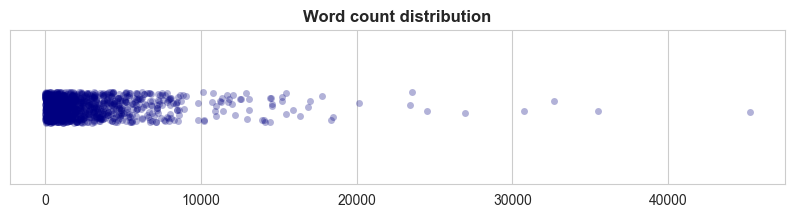

In [4]:
plt.figure(figsize=(10, 2))
plt.title('Word count distribution', weight='bold')
sns.stripplot(
        x='WC', data=df,
        jitter=True, alpha=.3,
        color='navy'
)
plt.xlabel("")
print(f"Minimum word count: {df['WC'].min()}")

- Instances with word count <= 50?

In [5]:
df.query("WC <= 50").shape[0]

45

In [4]:
threshold = int(input("Enter the minimum word count: ")) # 50
df = df.query('WC >= @threshold')
display_data_shape(df)

Data dimensions:
---------------------------------------------------------------------
 - Number of observations: 1,140
 - Number of columns: 97


### 1.3) Train-Test-Split
- define feature and predictor sets:

In [5]:
consumption = [c for c in df.columns if c.endswith('status')]
liwc        = [
        c for c in df.columns
            if c not in consumption
            and c != 'userid'
    ]

print(f"# features in liwc: {len(liwc)}")
print(f"Targets: {consumption}")

# features in liwc: 93
Targets: ['smoking_status', 'alcohol_status', 'drug_status']


- train-test-split():

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[liwc]
y_smoking, y_alcohol, y_drugs = df['smoking_status'].astype(int), df['alcohol_status'].astype(int), df['drug_status'].astype(int)

# split data for each of the three targets into train and test sets:

'Smoking'
X_train_smoke, X_test_smoke, \
    y_train_smoke, y_test_smoke = train_test_split(
                                            X, y_smoking, test_size=0.2, stratify=y_smoking, random_state=42
    )

'Alchohol'
X_train_alc, X_test_alc, \
    y_train_alc, y_test_alc = train_test_split(
                                            X, y_alcohol, test_size=0.2, stratify=y_alcohol, random_state=42
    )

'Drugs'
X_train_drug, X_test_drug, \
    y_train_drug, y_test_drug = train_test_split(
                                            X, y_drugs, test_size=0.2, stratify=y_drugs, random_state=42
    )

### 1.4) Feature Selection
#### 1.4.1) Distribution Analysis:

In [19]:
train_smoke = pd.concat([X_train_smoke, y_train_smoke], axis=1)
train_drug = pd.concat([X_train_drug, y_train_drug], axis=1)

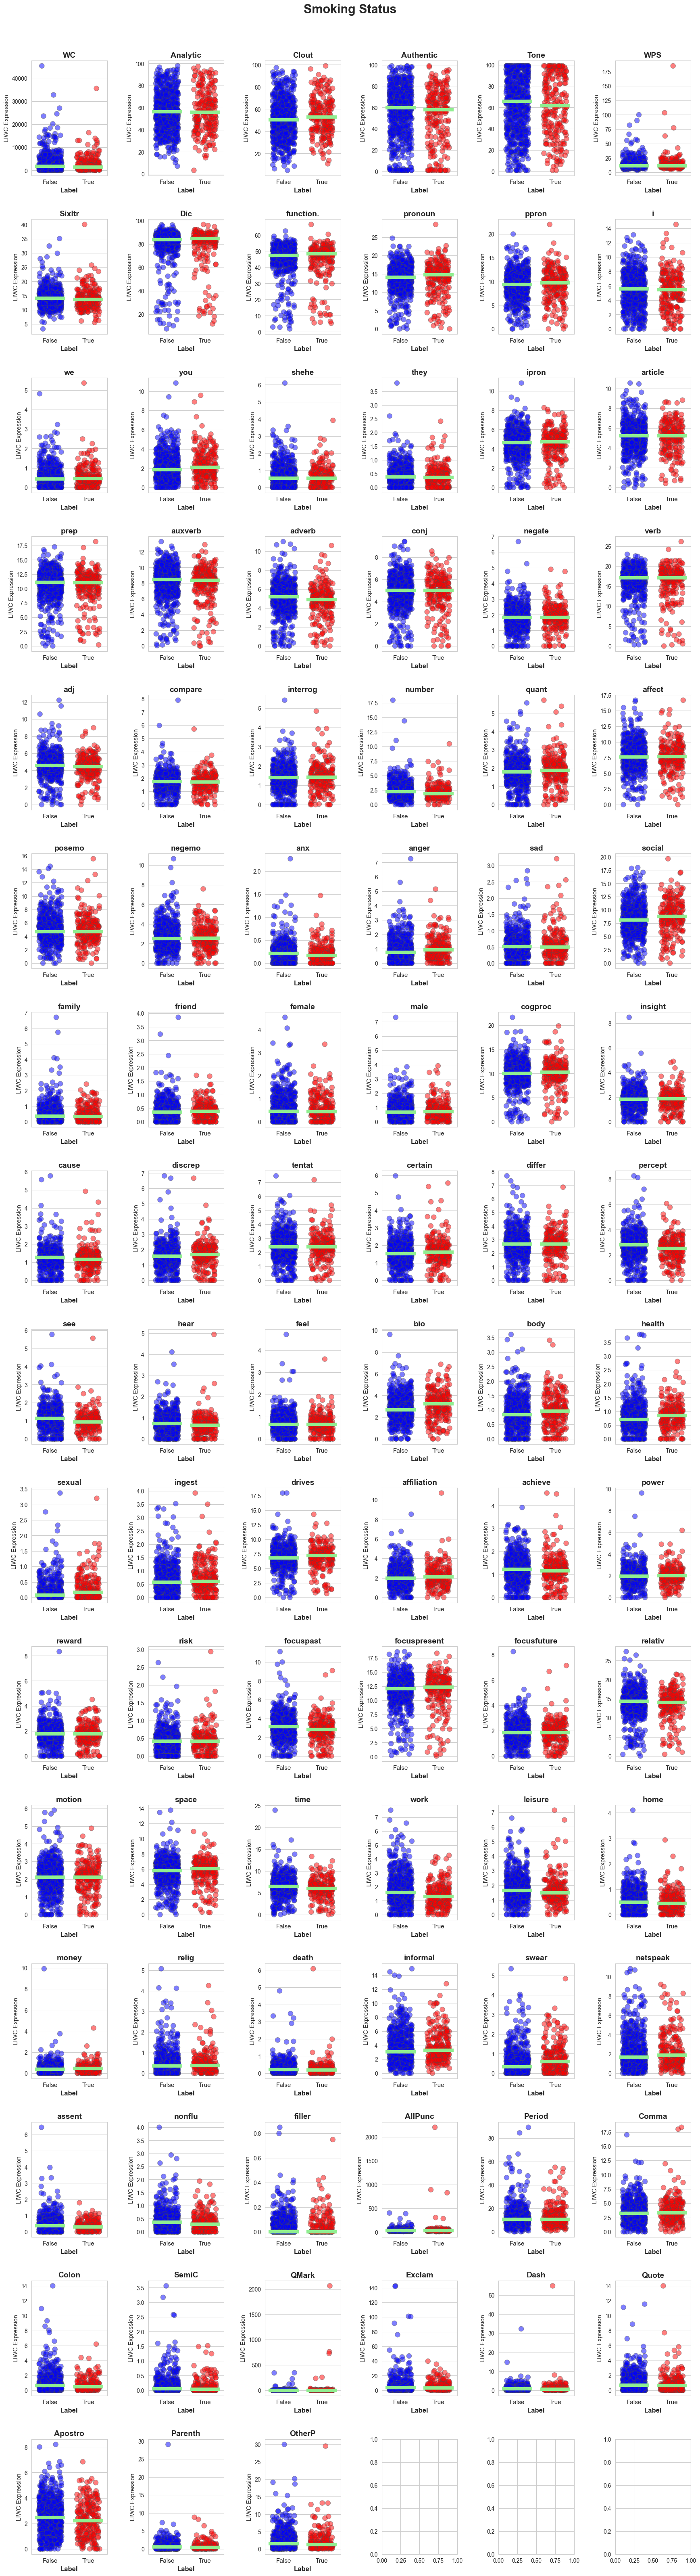

In [17]:
plot_continuous_features_target(
    df       = train_smoke,
    features = liwc,
    target   = 'smoking_status',
    title    = 'Smoking Status',
)

#### 1.4.2) Non-Normal: Mann-Whitney U

In [20]:
print("Smoking:")
smoking_features_df = mannwhitney(
    data     = train_smoke,
    features = liwc,
    target   = 'smoking_status',
    alpha    = 0.05
)
smoking_anova_features = smoking_features_df['feature'].tolist()
print(smoking_anova_features)
display(smoking_features_df.T)


print("\nDrugs:")
drugs_features_df = mannwhitney(
    data     = train_drug,
    features = liwc,
    target   = 'drug_status',
    alpha    = 0.05
)
drug_anova_features = drugs_features_df['feature'].tolist()
print(drug_anova_features)
display(drugs_features_df.T)

Smoking:
26 out of 93 features are significant with respect to smoking_status based on raw p-values:
['bio', 'swear', 'work', 'sexual', 'number', 'see', 'percept', 'Colon', 'focuspast', 'assent', 'time', 'adverb', 'health', 'nonflu', 'leisure', 'Sixltr', 'social', 'hear', 'body', 'anx', 'you', 'adj', 'anger', 'informal', 'cause', 'home']


0      1     2       3       4    5        6       7          8   \
feature  bio  swear  work  sexual  number  see  percept   Colon  focuspast   
p_value  0.0    0.0   0.0     0.0     0.0  0.0      0.0  0.0001     0.0002   

             9       10      11      12      13       14      15      16  \
feature  assent    time  adverb  health  nonflu  leisure  Sixltr  social   
p_value  0.0002  0.0006  0.0012  0.0015  0.0029   0.0051  0.0075  0.0094   

             17      18      19      20      21      22        23      24  \
feature    hear    body     anx     you     adj   anger  informal   cause   
p_value  0.0111  0.0129  0.0133  0.0163  0.0243  0.0246    0.0308  0.0368   

             25  
feature    home  
p_value  0.0492


Drugs:
24 out of 93 features are significant with respect to drug_status based on raw p-values:
['body', 'swear', 'ingest', 'sexual', 'anger', 'bio', 'number', 'discrep', 'filler', 'negemo', 'Tone', 'work', 'money', 'informal', 'focuspresent', 'ppron', 'pronoun', 'you', 'i', 'certain', 'health', 'time', 'Exclam', 'Colon']


0      1       2       3      4    5       6        7       8   \
feature  body  swear  ingest  sexual  anger  bio  number  discrep  filler   
p_value   0.0    0.0     0.0     0.0    0.0  0.0  0.0003   0.0009  0.0012   

             9       10      11      12        13            14      15  \
feature  negemo    Tone    work   money  informal  focuspresent   ppron   
p_value  0.0018  0.0019  0.0021  0.0022    0.0028        0.0048  0.0048   

              16      17      18       19      20      21      22     23  
feature  pronoun     you       i  certain  health    time  Exclam  Colon  
p_value   0.0094  0.0115  0.0139   0.0144  0.0157  0.0261  0.0434   0.05

### 1.5) Oversampling
- Target distributions before sampling:

In [21]:
plot_target_ratios(
    df      = df,
    targets = consumption,
)

- Oversampling:

In [34]:
# SMOTE Oversampling
from imblearn.over_sampling import SMOTE, RandomOverSampler

smote_ampler = SMOTE(random_state=42)
random_sampler = RandomOverSampler(random_state=42)

# Smoking
X_train_smoke_s, y_train_smoke_s = random_sampler.fit_resample(X_train_smoke, y_train_smoke)

# Drugs
X_train_drug_s, y_train_drug_s = random_sampler.fit_resample(X_train_drug, y_train_drug)

- Target distribution after sampling:

In [35]:
# Smoke:
print(f"N observations: {X_train_smoke_s.shape[0]}")

y_train_smoke_s.value_counts(normalize=True)

N observations: 1364


smoking_status
1    0.5
0    0.5
Name: proportion, dtype: float64

In [36]:
# Drugs:
print(f"N observations: {X_train_drug_s.shape[0]}")

y_train_drug_s.value_counts(normalize=True)

N observations: 1482


drug_status
1    0.5
0    0.5
Name: proportion, dtype: float64

## **2) Target: Smoking**
---
### 2.1) XGBoost

In [25]:
from xgboost import XGBClassifier
import optuna
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

#### 2.1.1 Base Model:

In [37]:
xgb_base = XGBClassifier(
    estimators=3,
    max_depth=3,
    random_state=42,
    n_jobs=-1,
    verbosity=0,
)

xgb_base.fit(
    X_train_smoke_s[smoking_anova_features],
    y_train_smoke_s
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, estimators=3, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

Train:


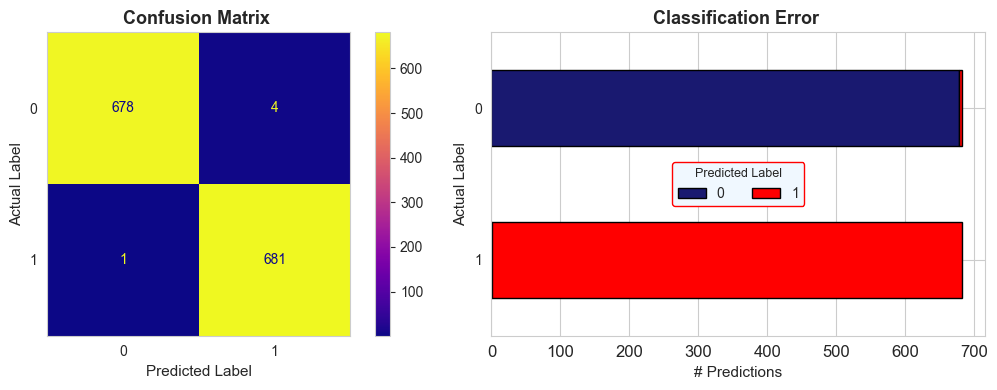

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 682 (50.0%)
- Class 1: 682 (50.0%)

Classification Report :
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Test:


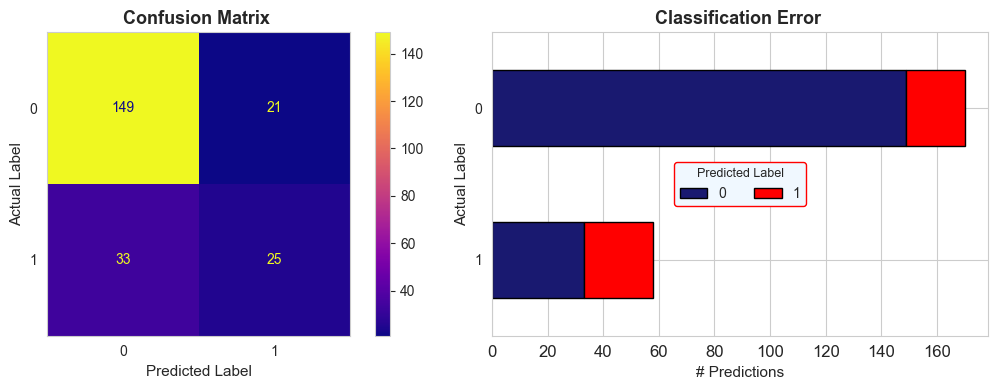

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 170 (75.0%)
- Class 1: 58 (25.0%)

Classification Report :
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [38]:
print(f"Train:")
classification_evaluation_report(
    model = xgb_base,
    X     = X_train_smoke_s[smoking_anova_features],
    y     = y_train_smoke_s,
)

print(f"Test:")
classification_evaluation_report(
    model = xgb_base,
    X     = X_test_smoke[smoking_anova_features],
    y     = y_test_smoke,
)

## **3) Target: Drugs**
---

In [39]:
xgb_base = XGBClassifier(
    estimators=3,
    max_depth=3,
    random_state=42,
    n_jobs=-1,
    verbosity=0,
)

xgb_base.fit(
    X_train_drug_s[drug_anova_features],
    y_train_drug_s
)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, estimators=3, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

Train:


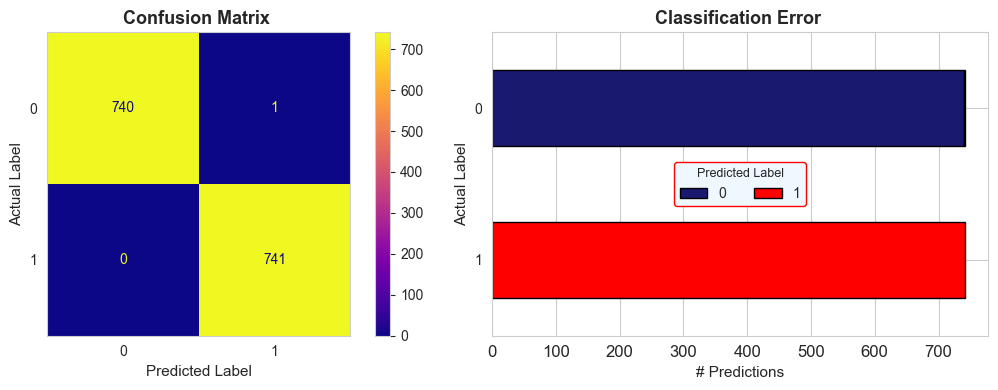

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 741 (50.0%)
- Class 1: 741 (50.0%)

Classification Report :
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Test:


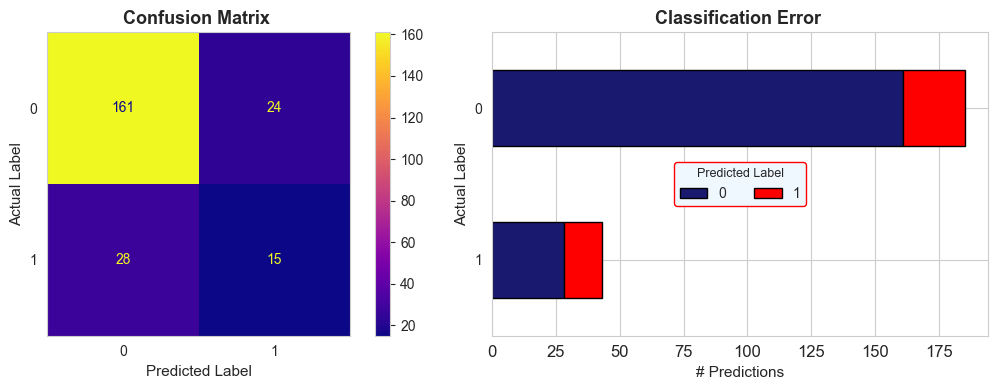

Class Distribution in Dataset:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- Class 0: 185 (81.0%)
- Class 1: 43 (19.0%)

Classification Report :
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [40]:
print(f"Train:")
classification_evaluation_report(
    model = xgb_base,
    X     = X_train_drug_s[drug_anova_features],
    y     = y_train_drug_s,
)

print(f"Test:")
classification_evaluation_report(
    model = xgb_base,
    X     = X_test_drug[drug_anova_features],
    y     = y_test_drug,
)